## Exercise 09 : Plotly

In [154]:
import pandas as pd
import sqlite3
import plotly.graph_objects as go

In [155]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [156]:
query = """
        select uid, timestamp, numTrials from checker
        where uid like 'user_%' and status = 'ready'
        and labname = 'project1'
        """

df = pd.read_sql(query, conn, parse_dates='timestamp')
df['timestamp'] = df['timestamp'].dt.date
df

,uid,timestamp,numTrials
0,user_4,2020-04-17,1
1,user_4,2020-04-17,2
2,user_4,2020-04-17,3
3,user_4,2020-04-17,4
4,user_4,2020-04-17,5
...,...,...,...
946,user_19,2020-05-15,26
947,user_19,2020-05-15,27
948,user_19,2020-05-15,28
949,user_28,2020-05-15,27


In [157]:
conn.close()

In [158]:
days = df.groupby(['timestamp']).max('numTrials').reset_index()
days['day'] = days.index.values
df = pd.merge(df, days, on='timestamp', suffixes=('', '_y'))
df

,uid,timestamp,numTrials,numTrials_y,day
0,user_4,2020-04-17,1,7,0
1,user_4,2020-04-17,2,7,0
2,user_4,2020-04-17,3,7,0
3,user_4,2020-04-17,4,7,0
4,user_4,2020-04-17,5,7,0
...,...,...,...,...,...
946,user_19,2020-05-15,26,29,18
947,user_19,2020-05-15,27,29,18
948,user_19,2020-05-15,28,29,18
949,user_28,2020-05-15,27,29,18


In [159]:
df = df.groupby(['uid', 'day'])['numTrials'].max().rename('max').reset_index()
df

,uid,day,max
0,user_1,17,11
1,user_10,15,7
2,user_10,16,21
3,user_10,17,59
4,user_11,6,1
...,...,...,...
89,user_4,16,137
90,user_4,17,164
91,user_6,16,1
92,user_6,17,2


In [160]:
pivot = df.pivot(index='uid', columns='day', values='max')
pivot = pivot.ffill(axis=1)
pivot = pivot.fillna(0)
pivot = pivot.astype(int)
pivot

day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
uid,,,,,,,,,,,,,,,,,,,
user_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11
user_10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,21,59,59
user_11,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
user_12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4
user_13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,30,30,32,32
user_14,0,0,0,0,0,0,0,0,1,1,1,1,18,25,49,92,92,99,99
user_15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3
user_16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,10,10
user_17,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,6,6


In [161]:
initial_data = [
    go.Scatter(
        x=pivot.columns,
        y=pivot.loc[uid],
        name=uid,
        mode='lines+markers'
    )
    for uid in pivot.index
]

print(initial_data[:3])

[Scatter({
    'mode': 'lines+markers',
    'name': 'user_1',
    'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                18]),
    'y': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,
                11])
}), Scatter({
    'mode': 'lines+markers',
    'name': 'user_10',
    'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                18]),
    'y': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7, 21, 59,
                59])
}), Scatter({
    'mode': 'lines+markers',
    'name': 'user_11',
    'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                18]),
    'y': array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
})]


In [162]:
frames = []
for i in range(1, len(pivot) + 1):
    frame_data = [
        go.Scatter(
            x=pivot.columns[:i],
            y=pivot.loc[uid][:i],
            mode='lines+markers',
            name=uid
        )
        for uid in pivot.index
    ]

    frames.append(go.Frame(data=frame_data, name=str(i)))

In [165]:
xa = len(pivot.columns)
ya = pivot.values.max() + 2

layout = go.Layout(
    title='Dynamic of commits per user in project1',
    xaxis=dict(range=(0, xa)),
    yaxis=dict(range=(0, ya)),
    updatemenus=[{
        'type': 'buttons',
        'buttons': [{'method': 'animate', 'label': 'play', 'args': [None]}]
    }]
)

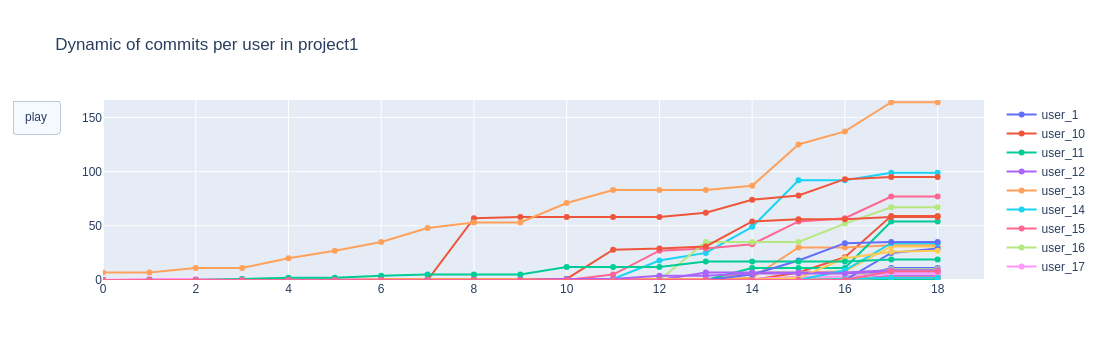

In [166]:
figure = go.Figure(data=initial_data, layout=layout, frames=frames)
figure.show()